we are going to discuss how to classify images using TensorFlow. Image Classification is a method to classify the images into their respective category classes. CIFAR-10 Dataset as it suggests has 10 different categories of images in it. There is a total of 60000 images of 10 different classes naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.

To build an image classifier we make use of tensorflow‘ s keras API to build our model. In order to build a model, it is recommended to have GPU support, or you may use the Google colab notebooks as well.

**Stepwise Implementation:**

The first step towards writing any code is to import all the required libraries and modules. This includes importing tensorflow and other modules like numpy. If the module is not present then you can download it using pip install tensorflow on the command prompt (for windows) or if you are using a jupyter notebook then simply type !pip install tensorflow in the cell and run it in order to download the module. Other modules can be imported similarly.

In [2]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.15.0


The output of the above code should display the version of tensorflow you are using eg 2.13.0 or any other.

Now we have the required module support so let’s load in our data. The dataset of CIFAR-10 is available on tensorflow keras API, and we can download it on our local machine using tensorflow.keras.datasets.cifar10 and then distribute it to train and test set using load_data() function.

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


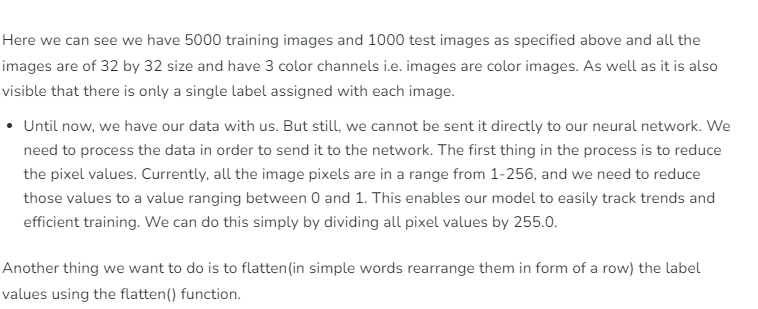

In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()



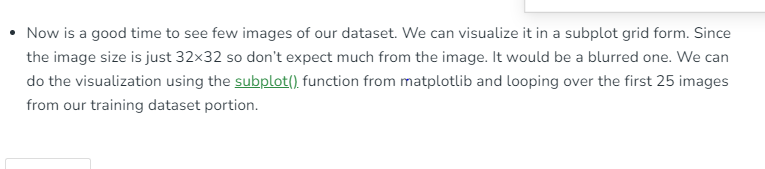

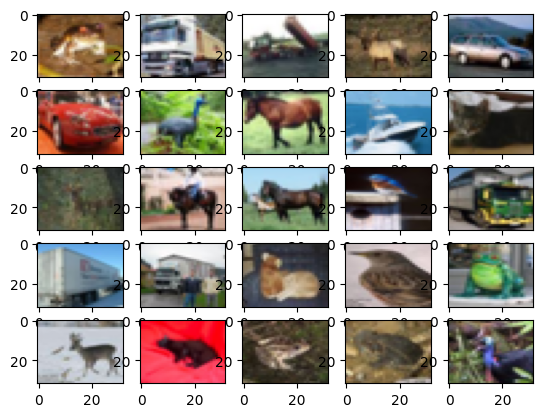

In [5]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


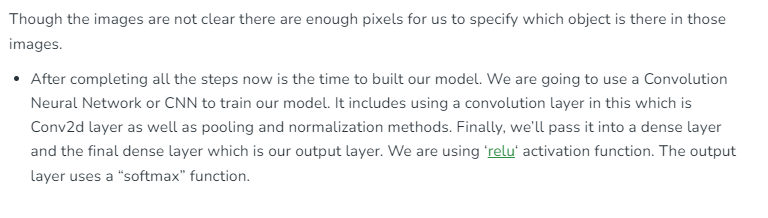

In [9]:
K = len(set(y_train))
K

10

In [10]:
i = Input(shape=x_train[0].shape)
i

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_3')>

In [11]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x

<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_6')>

In [6]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

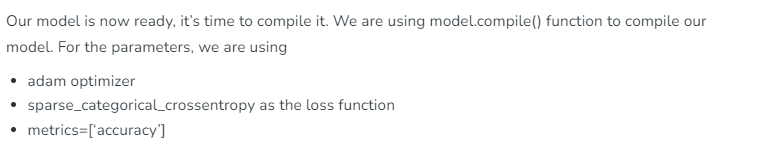

In [ ]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


Now let’s fit our model using model.fit() passing all our data to it. We are going to train our model till 50 epochs, it gives us a fair result though you can tweak it if you want.

In [ ]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
1563/1563 [==============================] - 1046s 667ms/step - loss: 1.2891 - accuracy: 0.5537 - val_loss: 1.1818 - val_accuracy: 0.5999
Epoch 2/5
1563/1563 [==============================] - 949s 607ms/step - loss: 0.8404 - accuracy: 0.7092 - val_loss: 0.9171 - val_accuracy: 0.6932
Epoch 3/5
1563/1563 [==============================] - 721s 461ms/step - loss: 0.6870 - accuracy: 0.7653 - val_loss: 0.6755 - val_accuracy: 0.7735
Epoch 4/5
1563/1563 [==============================] - 1020s 653ms/step - loss: 0.5807 - accuracy: 0.7992 - val_loss: 0.6324 - val_accuracy: 0.7868
Epoch 5/5
1563/1563 [==============================] - 846s 541ms/step - loss: 0.4906 - accuracy: 0.8314 - val_loss: 0.6341 - val_accuracy: 0.7866


After this, our model is trained. Though it will work fine but to make our model much more accurate we can add data augmentation on our data and then train it again. Calling model.fit() again on augmented data will continue training where it left off. We are going to fir our data on a batch size of 32 and we are going to shift the range of width and height by 0.1 and flip the images horizontally. Then call model.fit again for 50 epochs.

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=2)

Epoch 1/2
1562/1562 [==============================] - 807s 514ms/step - loss: 0.6773 - accuracy: 0.7700 - val_loss: 0.7794 - val_accuracy: 0.7545
Epoch 2/2
1562/1562 [==============================] - 778s 498ms/step - loss: 0.6120 - accuracy: 0.7947 - val_loss: 0.6042 - val_accuracy: 0.7982


The model will start training for 50 epochs. Though it is running on GPU it will take at least 10 to 15 minutes.

Now we have trained our model, before making any predictions from it let’s visualize the accuracy per iteration for better analysis. Though there are other methods that include confusion matrix for better analysis of the model.

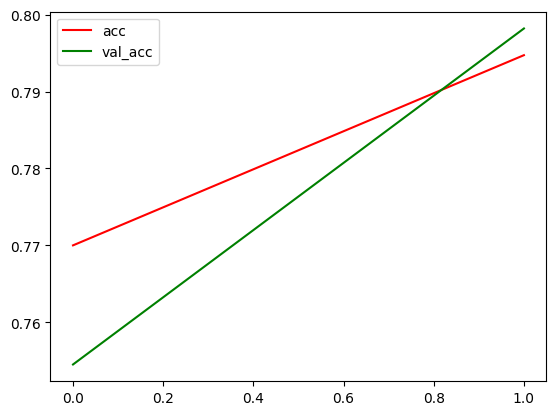

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

Let’s make a prediction over an image from our model using model.predict() function. Before sending the image to our model we need to again reduce the pixel values between 0 and 1 and change its shape to (1,32,32,3) as our model expects the input to be in this form only. To make things easy let us take an image from the dataset itself. It is already in reduced pixels format still we have to reshape it (1,32,32,3) using reshape() function. Since we are using data from the dataset we can compare the predicted output and original output.

1/1 [==============================] - 1s 1s/step
Original label is cat and predicted label is cat


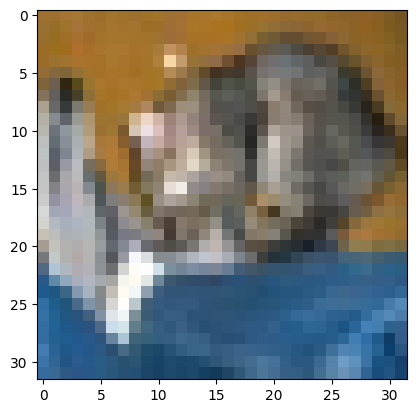

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))